# SmartBin-AI powered waste Classification (Week 1)

**PROBLEM STATEMENT**:

“Improper waste segregation leads to pollution and wasted resources. This project uses AI to automatically classify waste into 7 categories, enabling faster, accurate recycling and promoting a cleaner, sustainable environment.”

## Step 1: Import Libraries

We start by importing the basic Python libraries:
- **pandas**: for handling structured data
- **numpy**: for numerical operations


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fathimathrizwana","key":"d703c708db3742f64e21f5979cea4297"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle

## Step 2: Load Dataset

The dataset is downloaded from Kaggle (Multi-class Garbage Classification).  
It contains images of **7 waste categories** stored in folders.


In [ ]:
!kaggle datasets download -d vishallazrus/multi-class-garbage-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/vishallazrus/multi-class-garbage-classification-dataset
License(s): apache-2.0
  0% 0.00/29.2M [00:00<?, ?B/s]
100% 29.2M/29.2M [00:00<00:00, 1.15GB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile("multi-class-garbage-classification-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("waste_data")

os.listdir("waste_data")



['Multi class garbage classification']

In [ ]:
os.listdir("waste_data/Multi class garbage classification")


['labels.txt', 'test', 'train']

In [ ]:
# Look inside the train folder
train_path = "waste_data/Multi class garbage classification/train"

for folder in os.listdir(train_path):
    count = len(os.listdir(os.path.join(train_path, folder)))
    print(folder, ":", count, "images")


paper : 554 images
glass : 461 images
plastic : 438 images
cardboard : 363 images
metal : 370 images
compost : 139 images
trash : 141 images


## Step 3: Explore Dataset

Before training any model, we need to understand the dataset.  
We will:
- Check total number of images
- See distribution of classes
- Look for missing values
- View a random sample image


In [ ]:
import pandas as pd

data = []

for folder in os.listdir(train_path):
    for file in os.listdir(os.path.join(train_path, folder)):
        data.append([file, folder])

df = pd.DataFrame(data, columns=["filename", "class"])

# Now explore
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2466 non-null   object
 1   class     2466 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB
None
           filename  class
count          2466   2466
unique         2466      7
top     trash49.jpg  paper
freq              1    554
filename    0
class       0
dtype: int64


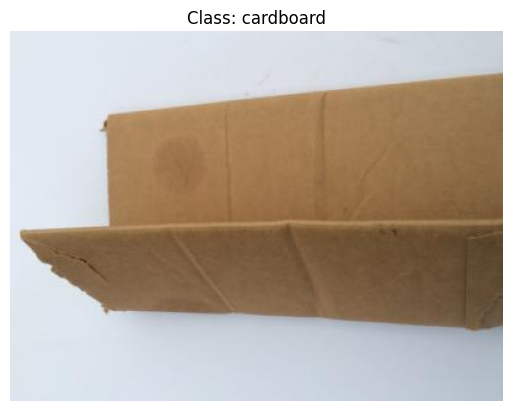

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Pick a random class
sample_class = random.choice(os.listdir(train_path))

# Pick a random image from that class
sample_image = random.choice(os.listdir(os.path.join(train_path, sample_class)))

# Load and show
img_path = os.path.join(train_path, sample_class, sample_image)
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Class: {sample_class}")
plt.axis("off")
plt.show()
